In [1]:
import torch 
import torchvision

torch.__version__, torchvision.__version__

('2.4.0', '0.19.0')

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
def set_seed(seed: int):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [4]:
from pathlib import Path 

IMAGE_PATH = Path("data/pizza_steak_sushi")
train_dir = IMAGE_PATH / "train"
test_dir = IMAGE_PATH / "test"

In [5]:
from torchvision import transforms 
from going_modular.going_modular import data_setup

normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
)

manual_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(), 
    normalize
])

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir, test_dir, manual_transform, 32, 0)

In [6]:
class_names

['pizza', 'steak', 'sushi']

In [7]:
from transfer_learning import model_builder

model_0 = model_builder.create_model_baseline_effnetb0(out_feats=len(class_names), device=device)

[INFO] created a model effnetb0


In [8]:
from torchinfo import summary

summary(model_0, (32, 3, 224, 224), col_names=["input_size", "output_size", "num_params", "trainable"],)

Layer (type:depth-idx)                                  Input Shape               Output Shape              Param #                   Trainable
EfficientNet                                            [32, 3, 224, 224]         [32, 3]                   --                        Partial
├─Sequential: 1-1                                       [32, 3, 224, 224]         [32, 1280, 7, 7]          --                        False
│    └─Conv2dNormActivation: 2-1                        [32, 3, 224, 224]         [32, 32, 112, 112]        --                        False
│    │    └─Conv2d: 3-1                                 [32, 3, 224, 224]         [32, 32, 112, 112]        (864)                     False
│    │    └─BatchNorm2d: 3-2                            [32, 32, 112, 112]        [32, 32, 112, 112]        (64)                      False
│    │    └─SiLU: 3-3                                   [32, 32, 112, 112]        [32, 32, 112, 112]        --                        --
│    └─Sequential

In [9]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [10]:
import helper_functions as hf

writer = hf.create_writer(experiment_name="original_data", model_name="effnetb0", extra="10_epochs")

[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\original_data\effnetb0\10_epochs


In [11]:
from transfer_learning import engine 

set_seed(seed=42)
result = engine.train(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=device, epochs=10, writer=writer)

c:\Users\bolth\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0901 | train_acc: 0.4375 | test_loss: 0.9141 | test_acc: 0.5085


 10%|█         | 1/10 [00:04<00:39,  4.39s/it]

Epoch: 2 | train_loss: 0.9046 | train_acc: 0.6523 | test_loss: 0.8037 | test_acc: 0.7538


 20%|██        | 2/10 [00:08<00:33,  4.15s/it]

Epoch: 3 | train_loss: 0.8018 | train_acc: 0.7305 | test_loss: 0.6782 | test_acc: 0.8968


 30%|███       | 3/10 [00:12<00:29,  4.21s/it]

Epoch: 4 | train_loss: 0.6778 | train_acc: 0.8594 | test_loss: 0.6665 | test_acc: 0.7945


 40%|████      | 4/10 [00:18<00:29,  4.84s/it]

Epoch: 5 | train_loss: 0.7158 | train_acc: 0.6992 | test_loss: 0.6621 | test_acc: 0.7945


 50%|█████     | 5/10 [00:24<00:26,  5.28s/it]

Epoch: 6 | train_loss: 0.5855 | train_acc: 0.9102 | test_loss: 0.5788 | test_acc: 0.8968


 60%|██████    | 6/10 [00:31<00:22,  5.73s/it]

Epoch: 7 | train_loss: 0.5604 | train_acc: 0.8047 | test_loss: 0.5257 | test_acc: 0.9072


 70%|███████   | 7/10 [00:36<00:17,  5.69s/it]

Epoch: 8 | train_loss: 0.5563 | train_acc: 0.8047 | test_loss: 0.5321 | test_acc: 0.9072


 80%|████████  | 8/10 [00:42<00:11,  5.56s/it]

Epoch: 9 | train_loss: 0.5126 | train_acc: 0.8242 | test_loss: 0.5070 | test_acc: 0.9176


 90%|█████████ | 9/10 [00:47<00:05,  5.42s/it]

Epoch: 10 | train_loss: 0.4412 | train_acc: 0.9453 | test_loss: 0.4449 | test_acc: 0.8968


100%|██████████| 10/10 [00:52<00:00,  5.28s/it]


In [12]:
result

{'train_loss': [1.0900676250457764,
  0.9045843482017517,
  0.8018361926078796,
  0.6778495907783508,
  0.7158164978027344,
  0.5854737162590027,
  0.5604322552680969,
  0.5563005208969116,
  0.5126393437385559,
  0.4412037432193756],
 'train_acc': [0.4375,
  0.65234375,
  0.73046875,
  0.859375,
  0.69921875,
  0.91015625,
  0.8046875,
  0.8046875,
  0.82421875,
  0.9453125],
 'test_loss': [0.9141465425491333,
  0.8036970098813375,
  0.6782492399215698,
  0.6665419141451517,
  0.662106990814209,
  0.5787953933080038,
  0.5257393519083658,
  0.5321095089117686,
  0.5070410966873169,
  0.4448671042919159],
 'test_acc': [0.5085227272727273,
  0.7537878787878788,
  0.8967803030303031,
  0.7945075757575758,
  0.7945075757575758,
  0.8967803030303031,
  0.9071969696969697,
  0.9071969696969697,
  0.9176136363636364,
  0.8967803030303031]}

## Experiment with different hyperparameters

In [13]:
from transfer_learning import data_setup as ds 

data_10_percent = ds.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip", 
                                    destination="pizza_steak_sushi")
data_20_percent = ds.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip", 
                                    destination="pizza_steak_sushi_20_percent")

[INFO] data\pizza_steak_sushi directory exists, skipping download.
[INFO] data\pizza_steak_sushi_20_percent directory exists, skipping download.


In [14]:
# setup training directories path 
train_dir_10_percent = data_10_percent / "train"
train_dir_20_percent = data_20_percent / "train"

# setup testing directory path 
test_dir = data_10_percent / "test"

In [15]:
from torchvision import transforms 

# Create a transform to normalize data distribution to be inline with ImageNet
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], # values per colour channel [red, green, blue]
                                 std=[0.229, 0.224, 0.225]) # values per colour channel [red, green, blue]


simple_transform = transforms.Compose([ 
    transforms.Resize(size=(224, 224)), 
    transforms.ToTensor(), 
    normalize
])

In [16]:
BATCH_SIZE = 32 

# setup dataloader for training data 
train_dataloader_10_percent, test_dataloader, class_names = ds.create_dataloaders(train_dir=train_dir_10_percent, test_dir=test_dir, transform=simple_transform, batch_size=BATCH_SIZE, num_workers=0)
train_dataloader_20_percent, test_dataloader, _ = ds.create_dataloaders(train_dir=train_dir_20_percent, test_dir=test_dir, transform=simple_transform, batch_size=BATCH_SIZE, num_workers=0)

len(train_dataloader_10_percent), len(train_dataloader_20_percent), len(test_dataloader)

(8, 15, 3)

In [17]:
from transfer_learning import model_builder as mb 
from torchinfo import summary

effnetb0 = mb.create_model_baseline_effnetb0(out_feats=len(class_names), device=device)
effnetb2 = mb.create_model_baseline_effnetb2(out_feats=len(class_names), device=device)

[INFO] created a model effnetb0
[INFO] created a model effnetb2


## create experiments and setup training code

In [86]:
num_epochs = [5, 10, 25]

# models list
models = ["effnetb0", "effnetb2"]
# create train dataloaders dictionary for various dataloaders
train_dataloaders = {"data_10_percent": train_dataloader_10_percent, "data_20_percent": train_dataloader_20_percent}

In [19]:
for d, t in train_dataloaders.items():
    print(d, t)

data_10_percent <torch.utils.data.dataloader.DataLoader object at 0x0000015AF2A757C0>
data_20_percent <torch.utils.data.dataloader.DataLoader object at 0x0000015AF290E030>


In [87]:
from going_modular.going_modular.utils import save_model 
from transfer_learning import model_builder as mb 
from transfer_learning import engine, utils

# 1. set seed
set_seed(seed=42)

# 2. keep track of experiment numbers 
experiment_number = 0 

# 3. loop through each dataloader 
for dataloader_name, train_dataloader in train_dataloaders.items():
    # 4. loop through each number of epochs 
    for epochs in num_epochs:
        # 5. loop through each model name and create a new model based on the name 
        for model_name in models:
            # 6. create information prints out 
            experiment_number += 1 
            print(f"[INFO] experiment number: {experiment_number}")
            print(f"[INFO] model: {model_name}")
            print(f"[INFO] dataloader: {dataloader_name}")
            print(f"[INFO] number of epochs: {epochs}")

            # 7. select the model 
            if model_name == "effnetb0":
                model = mb.create_model_baseline_effnetb0(out_feats=len(class_names), device=device)
            else: 
                model = mb.create_model_baseline_effnetb2(out_feats=len(class_names), device=device)
            
            # 8. create a new loss function for every model 
            loss_fn = torch.nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

            # 9. train target model with target dataloaders and track experiment
            engine.train(model=model, train_dataloader=train_dataloader, test_dataloader=test_dataloader, optimizer=optimizer, loss_fn=loss_fn, epochs=epochs, device=device, writer=hf.create_writer(experiment_name=dataloader_name, model_name=model_name, extra=f"{epochs}_epochs"))

            # 10. save the model to file
            save_filepath = f"07_{model_name}_{dataloader_name}_{epochs}_epochs.pt"
            utils.save_model(model=model, target_dir="models", model_name=save_filepath)
            print("-"*50+"\n")
            

[INFO] experiment number: 1
[INFO] model: effnetb0
[INFO] dataloader: data_10_percent
[INFO] number of epochs: 5
[INFO] created a model effnetb0
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_10_percent\effnetb0\5_epochs


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0351 | train_acc: 0.4961 | test_loss: 0.9161 | test_acc: 0.4678


 20%|██        | 1/5 [00:04<00:16,  4.06s/it]

Epoch: 2 | train_loss: 0.9491 | train_acc: 0.5117 | test_loss: 0.8296 | test_acc: 0.5805


 40%|████      | 2/5 [00:08<00:12,  4.07s/it]

Epoch: 3 | train_loss: 0.8223 | train_acc: 0.6836 | test_loss: 0.7249 | test_acc: 0.8248


 60%|██████    | 3/5 [00:11<00:07,  3.82s/it]

Epoch: 4 | train_loss: 0.7126 | train_acc: 0.7695 | test_loss: 0.6171 | test_acc: 0.8864


 80%|████████  | 4/5 [00:15<00:03,  3.66s/it]

Epoch: 5 | train_loss: 0.6168 | train_acc: 0.8945 | test_loss: 0.5821 | test_acc: 0.8968


100%|██████████| 5/5 [00:18<00:00,  3.72s/it]


[INFO] Saving model to: models\07_effnetb0_data_10_percent_5_epochs.pt
--------------------------------------------------

[INFO] experiment number: 2
[INFO] model: effnetb2
[INFO] dataloader: data_10_percent
[INFO] number of epochs: 5
[INFO] created a model effnetb2
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_10_percent\effnetb2\5_epochs


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0933 | train_acc: 0.3516 | test_loss: 0.9590 | test_acc: 0.6297


 20%|██        | 1/5 [00:04<00:17,  4.50s/it]

Epoch: 2 | train_loss: 0.8999 | train_acc: 0.6172 | test_loss: 0.9014 | test_acc: 0.6619


 40%|████      | 2/5 [00:09<00:13,  4.54s/it]

Epoch: 3 | train_loss: 0.8453 | train_acc: 0.6680 | test_loss: 0.8035 | test_acc: 0.8456


 60%|██████    | 3/5 [00:13<00:09,  4.60s/it]

Epoch: 4 | train_loss: 0.7021 | train_acc: 0.8672 | test_loss: 0.6891 | test_acc: 0.9072


 80%|████████  | 4/5 [00:18<00:04,  4.57s/it]

Epoch: 5 | train_loss: 0.7038 | train_acc: 0.7500 | test_loss: 0.6445 | test_acc: 0.8968


100%|██████████| 5/5 [00:22<00:00,  4.58s/it]


[INFO] Saving model to: models\07_effnetb2_data_10_percent_5_epochs.pt
--------------------------------------------------

[INFO] experiment number: 3
[INFO] model: effnetb0
[INFO] dataloader: data_10_percent
[INFO] number of epochs: 10
[INFO] created a model effnetb0
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_10_percent\effnetb0\10_epochs


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0351 | train_acc: 0.4961 | test_loss: 0.9161 | test_acc: 0.4678


 10%|█         | 1/10 [00:03<00:34,  3.84s/it]

Epoch: 2 | train_loss: 0.9491 | train_acc: 0.5117 | test_loss: 0.8296 | test_acc: 0.5805


 20%|██        | 2/10 [00:07<00:30,  3.76s/it]

Epoch: 3 | train_loss: 0.8223 | train_acc: 0.6836 | test_loss: 0.7249 | test_acc: 0.8248


 30%|███       | 3/10 [00:11<00:26,  3.78s/it]

Epoch: 4 | train_loss: 0.7126 | train_acc: 0.7695 | test_loss: 0.6171 | test_acc: 0.8864


 40%|████      | 4/10 [00:15<00:22,  3.75s/it]

Epoch: 5 | train_loss: 0.6168 | train_acc: 0.8945 | test_loss: 0.5821 | test_acc: 0.8968


 50%|█████     | 5/10 [00:18<00:18,  3.77s/it]

Epoch: 6 | train_loss: 0.5450 | train_acc: 0.8711 | test_loss: 0.5916 | test_acc: 0.8769


 60%|██████    | 6/10 [00:22<00:15,  3.82s/it]

Epoch: 7 | train_loss: 0.6362 | train_acc: 0.7188 | test_loss: 0.5932 | test_acc: 0.8561


 70%|███████   | 7/10 [00:26<00:11,  3.80s/it]

Epoch: 8 | train_loss: 0.5055 | train_acc: 0.8125 | test_loss: 0.5406 | test_acc: 0.8968


 80%|████████  | 8/10 [00:30<00:07,  3.74s/it]

Epoch: 9 | train_loss: 0.4683 | train_acc: 0.9180 | test_loss: 0.5326 | test_acc: 0.8759


 90%|█████████ | 9/10 [00:34<00:03,  3.78s/it]

Epoch: 10 | train_loss: 0.5740 | train_acc: 0.7383 | test_loss: 0.4879 | test_acc: 0.8759


100%|██████████| 10/10 [00:37<00:00,  3.79s/it]


[INFO] Saving model to: models\07_effnetb0_data_10_percent_10_epochs.pt
--------------------------------------------------

[INFO] experiment number: 4
[INFO] model: effnetb2
[INFO] dataloader: data_10_percent
[INFO] number of epochs: 10
[INFO] created a model effnetb2
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_10_percent\effnetb2\10_epochs


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0933 | train_acc: 0.3516 | test_loss: 0.9590 | test_acc: 0.6297


 10%|█         | 1/10 [00:04<00:41,  4.66s/it]

Epoch: 2 | train_loss: 0.8999 | train_acc: 0.6172 | test_loss: 0.9014 | test_acc: 0.6619


 20%|██        | 2/10 [00:09<00:37,  4.72s/it]

Epoch: 3 | train_loss: 0.8453 | train_acc: 0.6680 | test_loss: 0.8035 | test_acc: 0.8456


 30%|███       | 3/10 [00:14<00:33,  4.72s/it]

Epoch: 4 | train_loss: 0.7021 | train_acc: 0.8672 | test_loss: 0.6891 | test_acc: 0.9072


 40%|████      | 4/10 [00:18<00:28,  4.72s/it]

Epoch: 5 | train_loss: 0.7038 | train_acc: 0.7500 | test_loss: 0.6445 | test_acc: 0.8968


 50%|█████     | 5/10 [00:23<00:23,  4.73s/it]

Epoch: 6 | train_loss: 0.5932 | train_acc: 0.8984 | test_loss: 0.6548 | test_acc: 0.8769


 60%|██████    | 6/10 [00:28<00:19,  4.82s/it]

Epoch: 7 | train_loss: 0.6113 | train_acc: 0.8203 | test_loss: 0.6006 | test_acc: 0.9280


 70%|███████   | 7/10 [00:33<00:14,  4.86s/it]

Epoch: 8 | train_loss: 0.5198 | train_acc: 0.8203 | test_loss: 0.5957 | test_acc: 0.8977


 80%|████████  | 8/10 [00:38<00:09,  4.85s/it]

Epoch: 9 | train_loss: 0.5062 | train_acc: 0.9258 | test_loss: 0.5534 | test_acc: 0.8977


 90%|█████████ | 9/10 [00:43<00:04,  4.89s/it]

Epoch: 10 | train_loss: 0.5205 | train_acc: 0.8086 | test_loss: 0.5387 | test_acc: 0.9081


100%|██████████| 10/10 [00:48<00:00,  4.81s/it]


[INFO] Saving model to: models\07_effnetb2_data_10_percent_10_epochs.pt
--------------------------------------------------

[INFO] experiment number: 5
[INFO] model: effnetb0
[INFO] dataloader: data_10_percent
[INFO] number of epochs: 25
[INFO] created a model effnetb0
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_10_percent\effnetb0\25_epochs


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0351 | train_acc: 0.4961 | test_loss: 0.9161 | test_acc: 0.4678


  4%|▍         | 1/25 [00:03<01:34,  3.94s/it]

Epoch: 2 | train_loss: 0.9491 | train_acc: 0.5117 | test_loss: 0.8296 | test_acc: 0.5805


  8%|▊         | 2/25 [00:07<01:31,  3.98s/it]

Epoch: 3 | train_loss: 0.8223 | train_acc: 0.6836 | test_loss: 0.7249 | test_acc: 0.8248


 12%|█▏        | 3/25 [00:12<01:28,  4.04s/it]

Epoch: 4 | train_loss: 0.7126 | train_acc: 0.7695 | test_loss: 0.6171 | test_acc: 0.8864


 16%|█▌        | 4/25 [00:15<01:23,  3.97s/it]

Epoch: 5 | train_loss: 0.6168 | train_acc: 0.8945 | test_loss: 0.5821 | test_acc: 0.8968


 20%|██        | 5/25 [00:19<01:18,  3.94s/it]

Epoch: 6 | train_loss: 0.5450 | train_acc: 0.8711 | test_loss: 0.5916 | test_acc: 0.8769


 24%|██▍       | 6/25 [00:23<01:13,  3.88s/it]

Epoch: 7 | train_loss: 0.6362 | train_acc: 0.7188 | test_loss: 0.5932 | test_acc: 0.8561


 28%|██▊       | 7/25 [00:27<01:09,  3.87s/it]

Epoch: 8 | train_loss: 0.5055 | train_acc: 0.8125 | test_loss: 0.5406 | test_acc: 0.8968


 32%|███▏      | 8/25 [00:31<01:06,  3.91s/it]

Epoch: 9 | train_loss: 0.4683 | train_acc: 0.9180 | test_loss: 0.5326 | test_acc: 0.8759


 36%|███▌      | 9/25 [00:35<01:02,  3.92s/it]

Epoch: 10 | train_loss: 0.5740 | train_acc: 0.7383 | test_loss: 0.4879 | test_acc: 0.8759


 40%|████      | 10/25 [00:39<00:58,  3.87s/it]

Epoch: 11 | train_loss: 0.4359 | train_acc: 0.9453 | test_loss: 0.4721 | test_acc: 0.9176


 44%|████▍     | 11/25 [00:42<00:53,  3.85s/it]

Epoch: 12 | train_loss: 0.5024 | train_acc: 0.8164 | test_loss: 0.4803 | test_acc: 0.8968


 48%|████▊     | 12/25 [00:46<00:49,  3.84s/it]

Epoch: 13 | train_loss: 0.4893 | train_acc: 0.7812 | test_loss: 0.4564 | test_acc: 0.9280


 52%|█████▏    | 13/25 [00:50<00:46,  3.91s/it]

Epoch: 14 | train_loss: 0.4005 | train_acc: 0.9609 | test_loss: 0.3974 | test_acc: 0.8968


 56%|█████▌    | 14/25 [00:55<00:44,  4.03s/it]

Epoch: 15 | train_loss: 0.3735 | train_acc: 0.9375 | test_loss: 0.4027 | test_acc: 0.8968


 60%|██████    | 15/25 [00:59<00:41,  4.13s/it]

Epoch: 16 | train_loss: 0.4441 | train_acc: 0.8008 | test_loss: 0.4076 | test_acc: 0.8968


 64%|██████▍   | 16/25 [01:03<00:36,  4.02s/it]

Epoch: 17 | train_loss: 0.3346 | train_acc: 0.9727 | test_loss: 0.3987 | test_acc: 0.9072


 68%|██████▊   | 17/25 [01:07<00:31,  3.99s/it]

Epoch: 18 | train_loss: 0.4070 | train_acc: 0.8398 | test_loss: 0.4096 | test_acc: 0.9280


 72%|███████▏  | 18/25 [01:11<00:28,  4.01s/it]

Epoch: 19 | train_loss: 0.3609 | train_acc: 0.9531 | test_loss: 0.3787 | test_acc: 0.9280


 76%|███████▌  | 19/25 [01:15<00:24,  4.04s/it]

Epoch: 20 | train_loss: 0.3765 | train_acc: 0.8320 | test_loss: 0.3535 | test_acc: 0.9072


 80%|████████  | 20/25 [01:19<00:19,  3.97s/it]

Epoch: 21 | train_loss: 0.3909 | train_acc: 0.8398 | test_loss: 0.3849 | test_acc: 0.9384


 84%|████████▍ | 21/25 [01:23<00:15,  3.99s/it]

Epoch: 22 | train_loss: 0.3827 | train_acc: 0.8516 | test_loss: 0.3150 | test_acc: 0.9072


 88%|████████▊ | 22/25 [01:26<00:11,  3.92s/it]

Epoch: 23 | train_loss: 0.3509 | train_acc: 0.8281 | test_loss: 0.3164 | test_acc: 0.8968


 92%|█████████▏| 23/25 [01:30<00:07,  3.95s/it]

Epoch: 24 | train_loss: 0.3293 | train_acc: 0.9453 | test_loss: 0.3353 | test_acc: 0.9176


 96%|█████████▌| 24/25 [01:34<00:03,  3.93s/it]

Epoch: 25 | train_loss: 0.3106 | train_acc: 0.9727 | test_loss: 0.3071 | test_acc: 0.9072


100%|██████████| 25/25 [01:38<00:00,  3.95s/it]


[INFO] Saving model to: models\07_effnetb0_data_10_percent_25_epochs.pt
--------------------------------------------------

[INFO] experiment number: 6
[INFO] model: effnetb2
[INFO] dataloader: data_10_percent
[INFO] number of epochs: 25
[INFO] created a model effnetb2
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_10_percent\effnetb2\25_epochs


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0933 | train_acc: 0.3516 | test_loss: 0.9590 | test_acc: 0.6297


  4%|▍         | 1/25 [00:04<01:57,  4.91s/it]

Epoch: 2 | train_loss: 0.8999 | train_acc: 0.6172 | test_loss: 0.9014 | test_acc: 0.6619


  8%|▊         | 2/25 [00:09<01:52,  4.90s/it]

Epoch: 3 | train_loss: 0.8453 | train_acc: 0.6680 | test_loss: 0.8035 | test_acc: 0.8456


 12%|█▏        | 3/25 [00:14<01:49,  4.96s/it]

Epoch: 4 | train_loss: 0.7021 | train_acc: 0.8672 | test_loss: 0.6891 | test_acc: 0.9072


 16%|█▌        | 4/25 [00:19<01:43,  4.94s/it]

Epoch: 5 | train_loss: 0.7038 | train_acc: 0.7500 | test_loss: 0.6445 | test_acc: 0.8968


 20%|██        | 5/25 [00:24<01:38,  4.94s/it]

Epoch: 6 | train_loss: 0.5932 | train_acc: 0.8984 | test_loss: 0.6548 | test_acc: 0.8769


 24%|██▍       | 6/25 [00:29<01:35,  5.01s/it]

Epoch: 7 | train_loss: 0.6113 | train_acc: 0.8203 | test_loss: 0.6006 | test_acc: 0.9280


 28%|██▊       | 7/25 [00:34<01:29,  4.95s/it]

Epoch: 8 | train_loss: 0.5198 | train_acc: 0.8203 | test_loss: 0.5957 | test_acc: 0.8977


 32%|███▏      | 8/25 [00:39<01:24,  4.98s/it]

Epoch: 9 | train_loss: 0.5062 | train_acc: 0.9258 | test_loss: 0.5534 | test_acc: 0.8977


 36%|███▌      | 9/25 [00:44<01:19,  4.97s/it]

Epoch: 10 | train_loss: 0.5205 | train_acc: 0.8086 | test_loss: 0.5387 | test_acc: 0.9081


 40%|████      | 10/25 [00:49<01:14,  4.96s/it]

Epoch: 11 | train_loss: 0.4906 | train_acc: 0.7969 | test_loss: 0.5268 | test_acc: 0.8977


 44%|████▍     | 11/25 [00:54<01:10,  5.02s/it]

Epoch: 12 | train_loss: 0.3941 | train_acc: 0.9414 | test_loss: 0.5339 | test_acc: 0.9186


 48%|████▊     | 12/25 [00:59<01:05,  5.00s/it]

Epoch: 13 | train_loss: 0.5253 | train_acc: 0.7812 | test_loss: 0.5256 | test_acc: 0.9176


 52%|█████▏    | 13/25 [01:04<01:00,  5.01s/it]

Epoch: 14 | train_loss: 0.4795 | train_acc: 0.8242 | test_loss: 0.5251 | test_acc: 0.8873


 56%|█████▌    | 14/25 [01:09<00:55,  5.02s/it]

Epoch: 15 | train_loss: 0.4039 | train_acc: 0.8477 | test_loss: 0.4808 | test_acc: 0.9072


 60%|██████    | 15/25 [01:15<00:50,  5.08s/it]

Epoch: 16 | train_loss: 0.4204 | train_acc: 0.8008 | test_loss: 0.4441 | test_acc: 0.9280


 64%|██████▍   | 16/25 [01:20<00:45,  5.06s/it]

Epoch: 17 | train_loss: 0.5009 | train_acc: 0.8086 | test_loss: 0.4589 | test_acc: 0.8769


 68%|██████▊   | 17/25 [01:25<00:40,  5.10s/it]

Epoch: 18 | train_loss: 0.4069 | train_acc: 0.8281 | test_loss: 0.4793 | test_acc: 0.8977


 72%|███████▏  | 18/25 [01:30<00:35,  5.13s/it]

Epoch: 19 | train_loss: 0.4057 | train_acc: 0.8438 | test_loss: 0.4436 | test_acc: 0.9384


 76%|███████▌  | 19/25 [01:35<00:31,  5.22s/it]

Epoch: 20 | train_loss: 0.3580 | train_acc: 0.8555 | test_loss: 0.4444 | test_acc: 0.8977


 80%|████████  | 20/25 [01:40<00:25,  5.19s/it]

Epoch: 21 | train_loss: 0.3551 | train_acc: 0.8555 | test_loss: 0.4940 | test_acc: 0.8570


 84%|████████▍ | 21/25 [01:45<00:20,  5.14s/it]

Epoch: 22 | train_loss: 0.4177 | train_acc: 0.8359 | test_loss: 0.4343 | test_acc: 0.9280


 88%|████████▊ | 22/25 [01:51<00:15,  5.11s/it]

Epoch: 23 | train_loss: 0.3207 | train_acc: 0.9766 | test_loss: 0.4188 | test_acc: 0.9186


 92%|█████████▏| 23/25 [01:56<00:10,  5.19s/it]

Epoch: 24 | train_loss: 0.3769 | train_acc: 0.8398 | test_loss: 0.4035 | test_acc: 0.9489


 96%|█████████▌| 24/25 [02:01<00:05,  5.15s/it]

Epoch: 25 | train_loss: 0.3495 | train_acc: 0.8438 | test_loss: 0.4284 | test_acc: 0.8977


100%|██████████| 25/25 [02:06<00:00,  5.06s/it]


[INFO] Saving model to: models\07_effnetb2_data_10_percent_25_epochs.pt
--------------------------------------------------

[INFO] experiment number: 7
[INFO] model: effnetb0
[INFO] dataloader: data_20_percent
[INFO] number of epochs: 5
[INFO] created a model effnetb0
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_20_percent\effnetb0\5_epochs


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9648 | train_acc: 0.6042 | test_loss: 0.6642 | test_acc: 0.8864


 20%|██        | 1/5 [00:06<00:26,  6.63s/it]

Epoch: 2 | train_loss: 0.6948 | train_acc: 0.7812 | test_loss: 0.5834 | test_acc: 0.9072


 40%|████      | 2/5 [00:12<00:18,  6.26s/it]

Epoch: 3 | train_loss: 0.5867 | train_acc: 0.8417 | test_loss: 0.5039 | test_acc: 0.8977


 60%|██████    | 3/5 [00:18<00:12,  6.15s/it]

Epoch: 4 | train_loss: 0.4576 | train_acc: 0.9042 | test_loss: 0.4218 | test_acc: 0.9072


 80%|████████  | 4/5 [00:24<00:06,  6.09s/it]

Epoch: 5 | train_loss: 0.4585 | train_acc: 0.8521 | test_loss: 0.3881 | test_acc: 0.9280


100%|██████████| 5/5 [00:30<00:00,  6.12s/it]


[INFO] Saving model to: models\07_effnetb0_data_20_percent_5_epochs.pt
--------------------------------------------------

[INFO] experiment number: 8
[INFO] model: effnetb2
[INFO] dataloader: data_20_percent
[INFO] number of epochs: 5
[INFO] created a model effnetb2
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_20_percent\effnetb2\5_epochs


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9859 | train_acc: 0.5375 | test_loss: 0.7876 | test_acc: 0.8049


 20%|██        | 1/5 [00:07<00:28,  7.12s/it]

Epoch: 2 | train_loss: 0.7177 | train_acc: 0.7854 | test_loss: 0.6651 | test_acc: 0.8561


 40%|████      | 2/5 [00:14<00:21,  7.03s/it]

Epoch: 3 | train_loss: 0.5821 | train_acc: 0.8958 | test_loss: 0.5622 | test_acc: 0.9384


 60%|██████    | 3/5 [00:21<00:14,  7.21s/it]

Epoch: 4 | train_loss: 0.5351 | train_acc: 0.8542 | test_loss: 0.5183 | test_acc: 0.9280


 80%|████████  | 4/5 [00:29<00:07,  7.46s/it]

Epoch: 5 | train_loss: 0.4654 | train_acc: 0.8708 | test_loss: 0.4511 | test_acc: 0.9489


100%|██████████| 5/5 [00:36<00:00,  7.32s/it]


[INFO] Saving model to: models\07_effnetb2_data_20_percent_5_epochs.pt
--------------------------------------------------

[INFO] experiment number: 9
[INFO] model: effnetb0
[INFO] dataloader: data_20_percent
[INFO] number of epochs: 10
[INFO] created a model effnetb0
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_20_percent\effnetb0\10_epochs


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9648 | train_acc: 0.6042 | test_loss: 0.6642 | test_acc: 0.8864


 10%|█         | 1/10 [00:06<00:56,  6.26s/it]

Epoch: 2 | train_loss: 0.6948 | train_acc: 0.7812 | test_loss: 0.5834 | test_acc: 0.9072


 20%|██        | 2/10 [00:12<00:50,  6.26s/it]

Epoch: 3 | train_loss: 0.5867 | train_acc: 0.8417 | test_loss: 0.5039 | test_acc: 0.8977


 30%|███       | 3/10 [00:19<00:44,  6.36s/it]

Epoch: 4 | train_loss: 0.4576 | train_acc: 0.9042 | test_loss: 0.4218 | test_acc: 0.9072


 40%|████      | 4/10 [00:25<00:38,  6.37s/it]

Epoch: 5 | train_loss: 0.4585 | train_acc: 0.8521 | test_loss: 0.3881 | test_acc: 0.9280


 50%|█████     | 5/10 [00:31<00:31,  6.24s/it]

Epoch: 6 | train_loss: 0.4173 | train_acc: 0.8854 | test_loss: 0.3729 | test_acc: 0.9280


 60%|██████    | 6/10 [00:37<00:24,  6.22s/it]

Epoch: 7 | train_loss: 0.3909 | train_acc: 0.8604 | test_loss: 0.3383 | test_acc: 0.9176


 70%|███████   | 7/10 [00:43<00:18,  6.22s/it]

Epoch: 8 | train_loss: 0.3445 | train_acc: 0.8958 | test_loss: 0.3491 | test_acc: 0.9384


 80%|████████  | 8/10 [00:49<00:12,  6.17s/it]

Epoch: 9 | train_loss: 0.3701 | train_acc: 0.9000 | test_loss: 0.3426 | test_acc: 0.9384


 90%|█████████ | 9/10 [00:56<00:06,  6.24s/it]

Epoch: 10 | train_loss: 0.3751 | train_acc: 0.8917 | test_loss: 0.2853 | test_acc: 0.9176


100%|██████████| 10/10 [01:02<00:00,  6.25s/it]


[INFO] Saving model to: models\07_effnetb0_data_20_percent_10_epochs.pt
--------------------------------------------------

[INFO] experiment number: 10
[INFO] model: effnetb2
[INFO] dataloader: data_20_percent
[INFO] number of epochs: 10
[INFO] created a model effnetb2
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_20_percent\effnetb2\10_epochs


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9859 | train_acc: 0.5375 | test_loss: 0.7876 | test_acc: 0.8049


 10%|█         | 1/10 [00:07<01:06,  7.44s/it]

Epoch: 2 | train_loss: 0.7177 | train_acc: 0.7854 | test_loss: 0.6651 | test_acc: 0.8561


 20%|██        | 2/10 [00:14<00:58,  7.35s/it]

Epoch: 3 | train_loss: 0.5821 | train_acc: 0.8958 | test_loss: 0.5622 | test_acc: 0.9384


 30%|███       | 3/10 [00:22<00:51,  7.34s/it]

Epoch: 4 | train_loss: 0.5351 | train_acc: 0.8542 | test_loss: 0.5183 | test_acc: 0.9280


 40%|████      | 4/10 [00:29<00:43,  7.29s/it]

Epoch: 5 | train_loss: 0.4654 | train_acc: 0.8708 | test_loss: 0.4511 | test_acc: 0.9489


 50%|█████     | 5/10 [00:36<00:36,  7.25s/it]

Epoch: 6 | train_loss: 0.3848 | train_acc: 0.9062 | test_loss: 0.4626 | test_acc: 0.8977


 60%|██████    | 6/10 [00:44<00:29,  7.35s/it]

Epoch: 7 | train_loss: 0.3615 | train_acc: 0.9062 | test_loss: 0.4269 | test_acc: 0.9280


 70%|███████   | 7/10 [00:51<00:22,  7.37s/it]

Epoch: 8 | train_loss: 0.3308 | train_acc: 0.8938 | test_loss: 0.4190 | test_acc: 0.9176


 80%|████████  | 8/10 [00:58<00:14,  7.33s/it]

Epoch: 9 | train_loss: 0.3546 | train_acc: 0.8896 | test_loss: 0.4385 | test_acc: 0.8674


 90%|█████████ | 9/10 [01:06<00:07,  7.37s/it]

Epoch: 10 | train_loss: 0.3651 | train_acc: 0.8688 | test_loss: 0.3756 | test_acc: 0.9489


100%|██████████| 10/10 [01:13<00:00,  7.36s/it]


[INFO] Saving model to: models\07_effnetb2_data_20_percent_10_epochs.pt
--------------------------------------------------

[INFO] experiment number: 11
[INFO] model: effnetb0
[INFO] dataloader: data_20_percent
[INFO] number of epochs: 25
[INFO] created a model effnetb0
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_20_percent\effnetb0\25_epochs


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9648 | train_acc: 0.6042 | test_loss: 0.6642 | test_acc: 0.8864


  4%|▍         | 1/25 [00:06<02:41,  6.71s/it]

Epoch: 2 | train_loss: 0.6948 | train_acc: 0.7812 | test_loss: 0.5834 | test_acc: 0.9072


  8%|▊         | 2/25 [00:13<02:30,  6.52s/it]

Epoch: 3 | train_loss: 0.5867 | train_acc: 0.8417 | test_loss: 0.5039 | test_acc: 0.8977


 12%|█▏        | 3/25 [00:19<02:21,  6.43s/it]

Epoch: 4 | train_loss: 0.4576 | train_acc: 0.9042 | test_loss: 0.4218 | test_acc: 0.9072


 16%|█▌        | 4/25 [00:25<02:13,  6.35s/it]

Epoch: 5 | train_loss: 0.4585 | train_acc: 0.8521 | test_loss: 0.3881 | test_acc: 0.9280


 20%|██        | 5/25 [00:31<02:06,  6.34s/it]

Epoch: 6 | train_loss: 0.4173 | train_acc: 0.8854 | test_loss: 0.3729 | test_acc: 0.9280


 24%|██▍       | 6/25 [00:38<02:01,  6.41s/it]

Epoch: 7 | train_loss: 0.3909 | train_acc: 0.8604 | test_loss: 0.3383 | test_acc: 0.9176


 28%|██▊       | 7/25 [00:45<01:55,  6.44s/it]

Epoch: 8 | train_loss: 0.3445 | train_acc: 0.8958 | test_loss: 0.3491 | test_acc: 0.9384


 32%|███▏      | 8/25 [00:51<01:49,  6.43s/it]

Epoch: 9 | train_loss: 0.3701 | train_acc: 0.9000 | test_loss: 0.3426 | test_acc: 0.9384


 36%|███▌      | 9/25 [00:57<01:42,  6.43s/it]

Epoch: 10 | train_loss: 0.3751 | train_acc: 0.8917 | test_loss: 0.2853 | test_acc: 0.9176


 40%|████      | 10/25 [01:04<01:37,  6.52s/it]

Epoch: 11 | train_loss: 0.3523 | train_acc: 0.8771 | test_loss: 0.3301 | test_acc: 0.9384


 44%|████▍     | 11/25 [01:11<01:31,  6.52s/it]

Epoch: 12 | train_loss: 0.2842 | train_acc: 0.8958 | test_loss: 0.2642 | test_acc: 0.9072


 48%|████▊     | 12/25 [01:17<01:24,  6.47s/it]

Epoch: 13 | train_loss: 0.2626 | train_acc: 0.9354 | test_loss: 0.2930 | test_acc: 0.9280


 52%|█████▏    | 13/25 [01:24<01:18,  6.50s/it]

Epoch: 14 | train_loss: 0.2561 | train_acc: 0.9313 | test_loss: 0.2760 | test_acc: 0.9384


 56%|█████▌    | 14/25 [01:30<01:11,  6.50s/it]

Epoch: 15 | train_loss: 0.2982 | train_acc: 0.9021 | test_loss: 0.2698 | test_acc: 0.9384


 60%|██████    | 15/25 [01:37<01:05,  6.55s/it]

Epoch: 16 | train_loss: 0.2982 | train_acc: 0.9146 | test_loss: 0.2778 | test_acc: 0.9384


 64%|██████▍   | 16/25 [01:43<00:58,  6.54s/it]

Epoch: 17 | train_loss: 0.2370 | train_acc: 0.9396 | test_loss: 0.2409 | test_acc: 0.9280


 68%|██████▊   | 17/25 [01:50<00:52,  6.61s/it]

Epoch: 18 | train_loss: 0.2030 | train_acc: 0.9667 | test_loss: 0.2473 | test_acc: 0.9489


 72%|███████▏  | 18/25 [01:57<00:46,  6.71s/it]

Epoch: 19 | train_loss: 0.2638 | train_acc: 0.8854 | test_loss: 0.2646 | test_acc: 0.9280


 76%|███████▌  | 19/25 [02:04<00:40,  6.74s/it]

Epoch: 20 | train_loss: 0.2261 | train_acc: 0.9542 | test_loss: 0.2266 | test_acc: 0.9176


 80%|████████  | 20/25 [02:10<00:33,  6.65s/it]

Epoch: 21 | train_loss: 0.2307 | train_acc: 0.9271 | test_loss: 0.2333 | test_acc: 0.9280


 84%|████████▍ | 21/25 [02:17<00:26,  6.59s/it]

Epoch: 22 | train_loss: 0.2090 | train_acc: 0.9417 | test_loss: 0.2212 | test_acc: 0.9489


 88%|████████▊ | 22/25 [02:23<00:19,  6.56s/it]

Epoch: 23 | train_loss: 0.2520 | train_acc: 0.9271 | test_loss: 0.2239 | test_acc: 0.9489


 92%|█████████▏| 23/25 [02:30<00:13,  6.54s/it]

Epoch: 24 | train_loss: 0.3182 | train_acc: 0.9208 | test_loss: 0.2495 | test_acc: 0.9384


 96%|█████████▌| 24/25 [02:36<00:06,  6.53s/it]

Epoch: 25 | train_loss: 0.2179 | train_acc: 0.9542 | test_loss: 0.2513 | test_acc: 0.9384


100%|██████████| 25/25 [02:42<00:00,  6.52s/it]


[INFO] Saving model to: models\07_effnetb0_data_20_percent_25_epochs.pt
--------------------------------------------------

[INFO] experiment number: 12
[INFO] model: effnetb2
[INFO] dataloader: data_20_percent
[INFO] number of epochs: 25
[INFO] created a model effnetb2
[INFO] Created SummaryWriter(), saving to: runs\2024-08-23\data_20_percent\effnetb2\25_epochs


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9859 | train_acc: 0.5375 | test_loss: 0.7876 | test_acc: 0.8049


  4%|▍         | 1/25 [00:07<03:08,  7.84s/it]

Epoch: 2 | train_loss: 0.7177 | train_acc: 0.7854 | test_loss: 0.6651 | test_acc: 0.8561


  8%|▊         | 2/25 [00:15<02:58,  7.76s/it]

Epoch: 3 | train_loss: 0.5821 | train_acc: 0.8958 | test_loss: 0.5622 | test_acc: 0.9384


 12%|█▏        | 3/25 [00:23<02:49,  7.71s/it]

Epoch: 4 | train_loss: 0.5351 | train_acc: 0.8542 | test_loss: 0.5183 | test_acc: 0.9280


 16%|█▌        | 4/25 [00:31<02:42,  7.75s/it]

Epoch: 5 | train_loss: 0.4654 | train_acc: 0.8708 | test_loss: 0.4511 | test_acc: 0.9489


 20%|██        | 5/25 [00:38<02:34,  7.73s/it]

Epoch: 6 | train_loss: 0.3848 | train_acc: 0.9062 | test_loss: 0.4626 | test_acc: 0.8977


 24%|██▍       | 6/25 [00:46<02:27,  7.74s/it]

Epoch: 7 | train_loss: 0.3615 | train_acc: 0.9062 | test_loss: 0.4269 | test_acc: 0.9280


 28%|██▊       | 7/25 [00:54<02:20,  7.79s/it]

Epoch: 8 | train_loss: 0.3308 | train_acc: 0.8938 | test_loss: 0.4190 | test_acc: 0.9176


 32%|███▏      | 8/25 [01:02<02:14,  7.89s/it]

Epoch: 9 | train_loss: 0.3546 | train_acc: 0.8896 | test_loss: 0.4385 | test_acc: 0.8674


 36%|███▌      | 9/25 [01:10<02:05,  7.87s/it]

Epoch: 10 | train_loss: 0.3651 | train_acc: 0.8688 | test_loss: 0.3756 | test_acc: 0.9489


 40%|████      | 10/25 [01:18<01:57,  7.85s/it]

Epoch: 11 | train_loss: 0.2709 | train_acc: 0.9313 | test_loss: 0.3889 | test_acc: 0.8977


 44%|████▍     | 11/25 [01:26<01:51,  7.93s/it]

Epoch: 12 | train_loss: 0.2664 | train_acc: 0.9396 | test_loss: 0.3760 | test_acc: 0.9081


 48%|████▊     | 12/25 [01:34<01:43,  7.93s/it]

Epoch: 13 | train_loss: 0.2994 | train_acc: 0.9083 | test_loss: 0.3848 | test_acc: 0.8674


 52%|█████▏    | 13/25 [01:42<01:35,  7.99s/it]

Epoch: 14 | train_loss: 0.2671 | train_acc: 0.9104 | test_loss: 0.3342 | test_acc: 0.9489


 56%|█████▌    | 14/25 [01:50<01:27,  7.94s/it]

Epoch: 15 | train_loss: 0.2436 | train_acc: 0.9396 | test_loss: 0.3814 | test_acc: 0.8570


 60%|██████    | 15/25 [01:58<01:20,  8.03s/it]

Epoch: 16 | train_loss: 0.3331 | train_acc: 0.8750 | test_loss: 0.3659 | test_acc: 0.9072


 64%|██████▍   | 16/25 [02:06<01:13,  8.13s/it]

Epoch: 17 | train_loss: 0.3855 | train_acc: 0.9125 | test_loss: 0.3296 | test_acc: 0.9384


 68%|██████▊   | 17/25 [02:14<01:04,  8.07s/it]

Epoch: 18 | train_loss: 0.2600 | train_acc: 0.9208 | test_loss: 0.3911 | test_acc: 0.8570


 72%|███████▏  | 18/25 [02:22<00:55,  7.97s/it]

Epoch: 19 | train_loss: 0.3269 | train_acc: 0.9229 | test_loss: 0.3420 | test_acc: 0.9280


 76%|███████▌  | 19/25 [02:30<00:48,  8.11s/it]

Epoch: 20 | train_loss: 0.2547 | train_acc: 0.9146 | test_loss: 0.4047 | test_acc: 0.8267


 80%|████████  | 20/25 [02:38<00:40,  8.14s/it]

Epoch: 21 | train_loss: 0.2223 | train_acc: 0.9563 | test_loss: 0.3863 | test_acc: 0.8674


 84%|████████▍ | 21/25 [02:47<00:32,  8.20s/it]

Epoch: 22 | train_loss: 0.1903 | train_acc: 0.9604 | test_loss: 0.3233 | test_acc: 0.9280


 88%|████████▊ | 22/25 [02:55<00:24,  8.21s/it]

Epoch: 23 | train_loss: 0.1888 | train_acc: 0.9583 | test_loss: 0.3703 | test_acc: 0.8873


 92%|█████████▏| 23/25 [03:03<00:16,  8.23s/it]

Epoch: 24 | train_loss: 0.2017 | train_acc: 0.9313 | test_loss: 0.3226 | test_acc: 0.8674


 96%|█████████▌| 24/25 [03:13<00:08,  8.60s/it]

Epoch: 25 | train_loss: 0.2505 | train_acc: 0.9229 | test_loss: 0.3448 | test_acc: 0.8977


100%|██████████| 25/25 [03:21<00:00,  8.06s/it]

[INFO] Saving model to: models\07_effnetb2_data_20_percent_25_epochs.pt
--------------------------------------------------



In [163]:
best_model_path = "models/07_effnetb2_data_20_percent_25_epochs.pt"
best_model = mb.create_model_baseline_effnetb2(out_feats=len(class_names), device=device)
best_model.load_state_dict(torch.load(best_model_path))

[INFO] created a model effnetb2


C:\Users\bolth\AppData\Local\Temp\ipykernel_13872\1498484521.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(best_model_path))


<All keys matched successfully>

In [164]:
# Check the model file size
from pathlib import Path

# Get the model size in bytes then convert to megabytes
effnetb2_model_size = Path(best_model_path).stat().st_size // (1024*1024)
print(f"EfficientNetB2 feature extractor model size: {effnetb2_model_size} MB")

EfficientNetB2 feature extractor model size: 29 MB


In [135]:
simple_transform = transforms.Compose([ 
    transforms.Resize(size=(224, 224)), 
    transforms.ToTensor(), 
    normalize
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


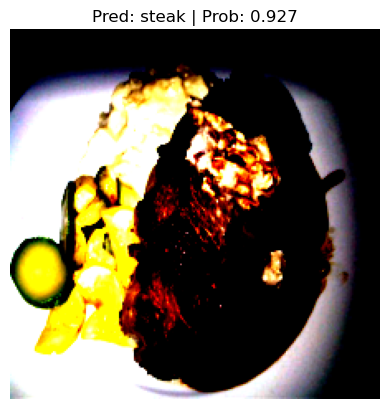

In [181]:
# Import function to make predictions on images and plot them 
# See the function previously created in section: https://www.learnpytorch.io/06_pytorch_transfer_learning/#6-make-predictions-on-images-from-the-test-set
from helper_functions import pred_and_plot_image

# Get a random list of 3 images from 20% test set
import random
num_images_to_plot = 3
test_image_path_list = list(Path(data_20_percent / "test").glob("*/*.jpg")) # get all test image paths from 20% dataset
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot) # randomly select k number of images

# Iterate through random test image paths, make predictions on them and plot them
for image_path in test_image_path_sample:
    pred_and_plot_image(model=best_model,
                        image_path=image_path,
                        class_names=class_names, 
                        device=device,
                        transform=simple_transform)

In [182]:
import matplotlib.pyplot as plt
from PIL import Image
import requests

def pred_and_plot(model: torch.nn.Module, 
                    image_path: str,
                    transform: transforms.Compose,
                    class_names: list[str] = None):
        model = model.to(device)
        # load image
        img = Image.open(requests.get(image_path, stream=True).raw).convert("RGB")
        # setup transformed image 
        transformed_img = transform(img).to(device)
        # forward pass 
        logits = model(transformed_img.unsqueeze(dim=0))
        pred = torch.softmax(logits, dim=-1).argmax(dim=-1)
        # plot the image along with the label 
        plt.imshow(transformed_img.permute(1, 2, 0).cpu())
        title = f"{class_names[pred]} | {torch.softmax(logits, dim=-1).max():.3f}"
        plt.title(title)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


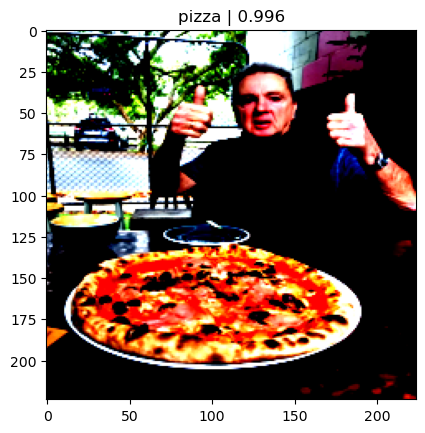

In [183]:
pred_and_plot(model=best_model, image_path="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg", 
                transform=simple_transform, class_names=class_names)